### Import Libraries and Load Data

In [1]:
import pandas as pd

## Load each CSV file into a DataFrame
media_customers_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_customers.csv')
media_show_events_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_show_events.csv')
media_subscription_events_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_subscription_events.csv')
media_shows_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_shows.csv')
media_episodes_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_episodes.csv')
media_campaign_fact_data_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/fact_media_campaign_data.csv')
media_campaign_dim_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/dim_media_campaign_data.csv')
media_customer_counts_df = pd.read_csv('/Users/aalladin/Downloads/Module 24/media_customer_counts.csv')

## Check the first few rows to understand the structure of datasets
print(media_customers_df.head())

   customer_id  customer_name  gender  age age_group          street_address  \
0            1   Alma Bassani  Female   18     18-24          329 4th Street   
1            2  Sherry Blanck  Female   25     25-34       1170 NEWBURY LN E   
2            3    Frank Leehy    Male   81       65+        3070 S Hadley Rd   
3            4   Warren Nease    Male   73       65+      1119 14TH St North   
4            5  Miguel Cavill    Male   37     35-44  7526 MUSTANG CORRAL DR   

              city state  zipcode              county   latitude   longitude  \
0  Manhattan Beach    CA    90266  Los Angeles County  33.880408 -118.406355   
1           Mobile    AL    36695       Mobile County  30.666030  -88.217780   
2       Ortonville    MI    48462      Oakland County  42.806329  -83.415179   
3       Birmingham    AL    35204    Jefferson County  33.522924  -86.821937   
4           Humble    TX    77338       Harris County  30.012319  -95.310301   

      region    opendate   closedate  

### Create a new column named 'churn' in the media_customers_df DataFrame based on the 'closedate' column

In [2]:
# Churn Column is created using closedate column
import numpy as np
media_customers_df['churn'] = np.where(media_customers_df['closedate'].isnull(), 0, 1)

### Show the DataFrame and Describe Statistics

In [3]:
print(media_customers_df.head())

   customer_id  customer_name  gender  age age_group          street_address  \
0            1   Alma Bassani  Female   18     18-24          329 4th Street   
1            2  Sherry Blanck  Female   25     25-34       1170 NEWBURY LN E   
2            3    Frank Leehy    Male   81       65+        3070 S Hadley Rd   
3            4   Warren Nease    Male   73       65+      1119 14TH St North   
4            5  Miguel Cavill    Male   37     35-44  7526 MUSTANG CORRAL DR   

              city state  zipcode              county   latitude   longitude  \
0  Manhattan Beach    CA    90266  Los Angeles County  33.880408 -118.406355   
1           Mobile    AL    36695       Mobile County  30.666030  -88.217780   
2       Ortonville    MI    48462      Oakland County  42.806329  -83.415179   
3       Birmingham    AL    35204    Jefferson County  33.522924  -86.821937   
4           Humble    TX    77338       Harris County  30.012319  -95.310301   

      region    opendate   closedate  

In [4]:
print(media_customers_df.describe())

        customer_id           age       zipcode      latitude     longitude  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean   25000.500000     42.847020  55540.028520     37.245224    -93.688938   
std    14433.901067     17.093322  30600.231617      5.251278     19.550242   
min        1.000000     18.000000   1001.000000     24.548970   -124.502256   
25%    12500.750000     29.000000  28327.750000     33.588416   -111.869720   
50%    25000.500000     40.000000  55122.500000     38.133583    -88.218068   
75%    37500.250000     54.000000  85044.000000     41.105573    -80.152949   
max    50000.000000     85.000000  99362.000000     48.971576    105.372330   

              churn  
count  50000.000000  
mean       0.325880  
std        0.468707  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  


### Calculate the viewing frequency for each customer and join this aggregated data back to the media_customers_df DataFrame

In [5]:
viewing_frequency_df = media_show_events_df.groupby('customer_id').size().reset_index(name='viewing_frequency')

In [6]:
media_customers_df = media_customers_df.merge(viewing_frequency_df, on='customer_id', how='left')

In [7]:
print(media_customers_df.head())

   customer_id  customer_name  gender  age age_group          street_address  \
0            1   Alma Bassani  Female   18     18-24          329 4th Street   
1            2  Sherry Blanck  Female   25     25-34       1170 NEWBURY LN E   
2            3    Frank Leehy    Male   81       65+        3070 S Hadley Rd   
3            4   Warren Nease    Male   73       65+      1119 14TH St North   
4            5  Miguel Cavill    Male   37     35-44  7526 MUSTANG CORRAL DR   

              city state  zipcode              county   latitude   longitude  \
0  Manhattan Beach    CA    90266  Los Angeles County  33.880408 -118.406355   
1           Mobile    AL    36695       Mobile County  30.666030  -88.217780   
2       Ortonville    MI    48462      Oakland County  42.806329  -83.415179   
3       Birmingham    AL    35204    Jefferson County  33.522924  -86.821937   
4           Humble    TX    77338       Harris County  30.012319  -95.310301   

      region    opendate   closedate  

In [8]:
print(media_customers_df.describe())

        customer_id           age       zipcode      latitude     longitude  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean   25000.500000     42.847020  55540.028520     37.245224    -93.688938   
std    14433.901067     17.093322  30600.231617      5.251278     19.550242   
min        1.000000     18.000000   1001.000000     24.548970   -124.502256   
25%    12500.750000     29.000000  28327.750000     33.588416   -111.869720   
50%    25000.500000     40.000000  55122.500000     38.133583    -88.218068   
75%    37500.250000     54.000000  85044.000000     41.105573    -80.152949   
max    50000.000000     85.000000  99362.000000     48.971576    105.372330   

              churn  viewing_frequency  
count  50000.000000       17044.000000  
mean       0.325880         122.463741  
std        0.468707          69.740394  
min        0.000000           1.000000  
25%        0.000000          77.000000  
50%        0.000000         114.000000  
7

In [9]:
media_customers_df.head(10)

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,latitude,longitude,region,opendate,closedate,churn,viewing_frequency
0,1,Alma Bassani,Female,18,18-24,329 4th Street,Manhattan Beach,CA,90266,Los Angeles County,33.880408,-118.406355,West,2018-03-09,NaN,0,186.0
1,2,Sherry Blanck,Female,25,25-34,1170 NEWBURY LN E,Mobile,AL,36695,Mobile County,30.666030,-88.217780,South,2017-10-18,NaN,0,141.0
2,3,Frank Leehy,Male,81,65+,3070 S Hadley Rd,Ortonville,MI,48462,Oakland County,42.806329,-83.415179,Midwest,2018-03-03,2019-04-23,1,139.0
3,4,Warren Nease,Male,73,65+,1119 14TH St North,Birmingham,AL,35204,Jefferson County,33.522924,-86.821937,South,2018-03-25,2018-07-30,1,11.0
4,5,Miguel Cavill,Male,37,35-44,7526 MUSTANG CORRAL DR,Humble,TX,77338,Harris County,30.012319,-95.310301,Southwest,2017-07-17,2019-04-24,1,169.0
5,6,Jimmie Roberge,Male,28,25-34,5055 N BEACH RD,Englewood,FL,34223,Sarasota County,26.944561,-82.370568,South,2018-05-19,NaN,0,170.0
6,7,Herman Eull,Male,25,25-34,239 B ELDER ST,Greenville,SC,29607,Greenville County,34.840621,-82.373972,South,2018-04-18,NaN,0,101.0
7,8,Jane Bahn,Female,39,35-44,514 ANTRIM RD,Xenia,OH,45385,Greene County,39.691271,-83.942971,Midwest,2017-11-08,NaN,0,216.0
8,9,Russell Poepping,Male,24,18-24,1786 200TH AVE,New Richmond,WI,54017,St Croix County,45.182355,-92.448899,Midwest,2018-04-08,NaN,0,114.0
9,10,Roland Troidl,Male,38,35-44,1503 MARSHALL LN,Austin,TX,78703,Travis County,30.282095,-97.755623,Southwest,2017-10-10,NaN,0,238.0


### Fill NaN values with zeros and convert the column to integers

In [10]:
media_customers_df['viewing_frequency'] = media_customers_df['viewing_frequency'].fillna(0).astype(int)

### Calculate the total number of unique shows per customer and join the total shows dataframe with the media customers dataframe

In [11]:
# Calculate the total number of unique shows for each customer
total_shows_df = media_show_events_df.groupby('customer_id')['show_id'].nunique().reset_index(name='Total_No_of_Shows')

# Merge the total shows dataframe with the media customers dataframe
media_customers_df = media_customers_df.merge(total_shows_df, on='customer_id', how='left')

# Display the results
print(media_customers_df.head())
print(media_customers_df.describe())

   customer_id  customer_name  gender  age age_group          street_address  \
0            1   Alma Bassani  Female   18     18-24          329 4th Street   
1            2  Sherry Blanck  Female   25     25-34       1170 NEWBURY LN E   
2            3    Frank Leehy    Male   81       65+        3070 S Hadley Rd   
3            4   Warren Nease    Male   73       65+      1119 14TH St North   
4            5  Miguel Cavill    Male   37     35-44  7526 MUSTANG CORRAL DR   

              city state  zipcode              county   latitude   longitude  \
0  Manhattan Beach    CA    90266  Los Angeles County  33.880408 -118.406355   
1           Mobile    AL    36695       Mobile County  30.666030  -88.217780   
2       Ortonville    MI    48462      Oakland County  42.806329  -83.415179   
3       Birmingham    AL    35204    Jefferson County  33.522924  -86.821937   
4           Humble    TX    77338       Harris County  30.012319  -95.310301   

      region    opendate   closedate  

### Dropping columns that are not needed

In [12]:
# Dropping 'opendate', 'closedate', 'latitude', and 'longitude' columns
media_customers_df.drop(['opendate', 'closedate', 'latitude', 'longitude'], axis=1, inplace=True)

# Display the DataFrame after dropping the columns
print(media_customers_df.head())

   customer_id  customer_name  gender  age age_group          street_address  \
0            1   Alma Bassani  Female   18     18-24          329 4th Street   
1            2  Sherry Blanck  Female   25     25-34       1170 NEWBURY LN E   
2            3    Frank Leehy    Male   81       65+        3070 S Hadley Rd   
3            4   Warren Nease    Male   73       65+      1119 14TH St North   
4            5  Miguel Cavill    Male   37     35-44  7526 MUSTANG CORRAL DR   

              city state  zipcode              county     region  churn  \
0  Manhattan Beach    CA    90266  Los Angeles County       West      0   
1           Mobile    AL    36695       Mobile County      South      0   
2       Ortonville    MI    48462      Oakland County    Midwest      1   
3       Birmingham    AL    35204    Jefferson County      South      1   
4           Humble    TX    77338       Harris County  Southwest      1   

   viewing_frequency  Total_No_of_Shows  
0                186      

### Fill the null values in the viewing_frequency and total_view_duration columns with their respective median values, fill the null values in the total_no_of_shows column with its mean value, and fill the null values in the county column with the string 'Los Angeles County'. 

In [13]:
# Replacing Null values with Mean/Median values of each column based on EDA
media_customers_df['viewing_frequency'].fillna(media_customers_df['viewing_frequency'].median(), inplace=True)
media_customers_df['Total_No_of_Shows'].fillna(media_customers_df['Total_No_of_Shows'].mean(), inplace=True)

# Replacing a few (in 10's) NULL county rows with 'Los Angeles County', which is the highest count in the County column
media_customers_df['county'].fillna('Los Angeles County', inplace=True)

### Merge 'media_customers_df' with 'media_show_events_df' on 'customer_id' and calculate the sum of 'viewruntime' for each customer. 

In [14]:
# Merge 'media_customers_df' with 'media_show_events_df' on 'customer_id' and calculate the sum of 'viewruntime'
# for each customer. Then, reset the index to flatten the DataFrame.
Total_view_Duration_df = media_customers_df.merge(media_show_events_df, on='customer_id').groupby('customer_id').agg(
    total_view_duration=pd.NamedAgg(column="viewruntime", aggfunc="sum")
).reset_index()

In [15]:
# Merge the 'Total_view_Duration_df' back into the 'media_customers_df' to add the total viewing duration information.
# Use a left join to keep all records from 'media_customers_df' and match records from 'Total_view_Duration_df'.
media_customers_df = media_customers_df.merge(Total_view_Duration_df, on='customer_id', how='left')

In [16]:
# Display the first 10 rows of the updated 'media_customers_df'
media_customers_df.head(10)

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,region,churn,viewing_frequency,Total_No_of_Shows,total_view_duration
0,1,Alma Bassani,Female,18,18-24,329 4th Street,Manhattan Beach,CA,90266,Los Angeles County,West,0,186,25.0,7057.0
1,2,Sherry Blanck,Female,25,25-34,1170 NEWBURY LN E,Mobile,AL,36695,Mobile County,South,0,141,14.0,7376.0
2,3,Frank Leehy,Male,81,65+,3070 S Hadley Rd,Ortonville,MI,48462,Oakland County,Midwest,1,139,22.0,5592.0
3,4,Warren Nease,Male,73,65+,1119 14TH St North,Birmingham,AL,35204,Jefferson County,South,1,11,2.0,589.0
4,5,Miguel Cavill,Male,37,35-44,7526 MUSTANG CORRAL DR,Humble,TX,77338,Harris County,Southwest,1,169,21.0,7651.0
5,6,Jimmie Roberge,Male,28,25-34,5055 N BEACH RD,Englewood,FL,34223,Sarasota County,South,0,170,17.0,6684.0
6,7,Herman Eull,Male,25,25-34,239 B ELDER ST,Greenville,SC,29607,Greenville County,South,0,101,14.0,4512.0
7,8,Jane Bahn,Female,39,35-44,514 ANTRIM RD,Xenia,OH,45385,Greene County,Midwest,0,216,28.0,9121.0
8,9,Russell Poepping,Male,24,18-24,1786 200TH AVE,New Richmond,WI,54017,St Croix County,Midwest,0,114,14.0,5145.0
9,10,Roland Troidl,Male,38,35-44,1503 MARSHALL LN,Austin,TX,78703,Travis County,Southwest,0,238,28.0,10461.0


### Count the total number of unique shows watched by each customer and merge it back to customer dataframe

In [17]:
# Merge 'media_customers_df' with 'media_show_events_df' on 'customer_id', then drop duplicates
# to ensure that each show is only counted once per customer.
unique_shows_df = media_customers_df.merge(media_show_events_df, on='customer_id').drop_duplicates(subset=['customer_id', 'show_id'])

In [18]:
# Group by 'customer_id' to count unique shows
total_shows_df = unique_shows_df.groupby('customer_id').agg(
    total_no_of_shows=pd.NamedAgg(column="show_id", aggfunc="nunique")
).reset_index()

In [19]:
# Merge the 'total_shows_df' back into the 'media_customers_df' to add the total number of unique shows information.
# Use a left join to keep all records from 'media_customers_df' and match records from 'total_shows_df'.
media_customers_df = media_customers_df.merge(total_shows_df, on='customer_id', how='left')

In [20]:
# Display the first 10 rows of the updated 'media_customers_df'
media_customers_df.head(10)

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,region,churn,viewing_frequency,Total_No_of_Shows,total_view_duration,total_no_of_shows
0,1,Alma Bassani,Female,18,18-24,329 4th Street,Manhattan Beach,CA,90266,Los Angeles County,West,0,186,25.0,7057.0,25.0
1,2,Sherry Blanck,Female,25,25-34,1170 NEWBURY LN E,Mobile,AL,36695,Mobile County,South,0,141,14.0,7376.0,14.0
2,3,Frank Leehy,Male,81,65+,3070 S Hadley Rd,Ortonville,MI,48462,Oakland County,Midwest,1,139,22.0,5592.0,22.0
3,4,Warren Nease,Male,73,65+,1119 14TH St North,Birmingham,AL,35204,Jefferson County,South,1,11,2.0,589.0,2.0
4,5,Miguel Cavill,Male,37,35-44,7526 MUSTANG CORRAL DR,Humble,TX,77338,Harris County,Southwest,1,169,21.0,7651.0,21.0
5,6,Jimmie Roberge,Male,28,25-34,5055 N BEACH RD,Englewood,FL,34223,Sarasota County,South,0,170,17.0,6684.0,17.0
6,7,Herman Eull,Male,25,25-34,239 B ELDER ST,Greenville,SC,29607,Greenville County,South,0,101,14.0,4512.0,14.0
7,8,Jane Bahn,Female,39,35-44,514 ANTRIM RD,Xenia,OH,45385,Greene County,Midwest,0,216,28.0,9121.0,28.0
8,9,Russell Poepping,Male,24,18-24,1786 200TH AVE,New Richmond,WI,54017,St Croix County,Midwest,0,114,14.0,5145.0,14.0
9,10,Roland Troidl,Male,38,35-44,1503 MARSHALL LN,Austin,TX,78703,Travis County,Southwest,0,238,28.0,10461.0,28.0


### Save this merged dataset into a csv

In [21]:
media_customers_df.to_csv('/Users/aalladin/Downloads/Module 24/media_customers_data.csv', index=False)

### Data Cleaning

In [22]:
len(media_customers_df)

50000

### Encoding categorical feature columns. gender & age group can be mapped to numerical values

In [23]:
import numpy as np

# Encoding 'gender' column: Female as 0, Male as 1
media_customers_df['gender'] = np.where(media_customers_df['gender'] == 'Female', 0, 1)

# Display the first few rows of the DataFrame
media_customers_df.head()

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,region,churn,viewing_frequency,Total_No_of_Shows,total_view_duration,total_no_of_shows
0,1,Alma Bassani,0,18,18-24,329 4th Street,Manhattan Beach,CA,90266,Los Angeles County,West,0,186,25.0,7057.0,25.0
1,2,Sherry Blanck,0,25,25-34,1170 NEWBURY LN E,Mobile,AL,36695,Mobile County,South,0,141,14.0,7376.0,14.0
2,3,Frank Leehy,1,81,65+,3070 S Hadley Rd,Ortonville,MI,48462,Oakland County,Midwest,1,139,22.0,5592.0,22.0
3,4,Warren Nease,1,73,65+,1119 14TH St North,Birmingham,AL,35204,Jefferson County,South,1,11,2.0,589.0,2.0
4,5,Miguel Cavill,1,37,35-44,7526 MUSTANG CORRAL DR,Humble,TX,77338,Harris County,Southwest,1,169,21.0,7651.0,21.0


In [24]:
# Define the conditions for each age group
conditions = [
    media_customers_df['age_group'] == '18-24', 
    media_customers_df['age_group'] == '25-34',
    media_customers_df['age_group'] == '35-44',
    media_customers_df['age_group'] == '45-54',
    media_customers_df['age_group'] == '55-64',
    media_customers_df['age_group'] == '65+'
]

# Define the corresponding choices for each condition
choices = [0, 1, 2, 3, 4, 5]

# Apply the encoding using np.select
media_customers_df['age_group'] = np.select(conditions, choices, default=-1)

# Display the first few rows of the DataFrame to confirm changes
media_customers_df.head()

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,region,churn,viewing_frequency,Total_No_of_Shows,total_view_duration,total_no_of_shows
0,1,Alma Bassani,0,18,0,329 4th Street,Manhattan Beach,CA,90266,Los Angeles County,West,0,186,25.0,7057.0,25.0
1,2,Sherry Blanck,0,25,1,1170 NEWBURY LN E,Mobile,AL,36695,Mobile County,South,0,141,14.0,7376.0,14.0
2,3,Frank Leehy,1,81,5,3070 S Hadley Rd,Ortonville,MI,48462,Oakland County,Midwest,1,139,22.0,5592.0,22.0
3,4,Warren Nease,1,73,5,1119 14TH St North,Birmingham,AL,35204,Jefferson County,South,1,11,2.0,589.0,2.0
4,5,Miguel Cavill,1,37,2,7526 MUSTANG CORRAL DR,Humble,TX,77338,Harris County,Southwest,1,169,21.0,7651.0,21.0


### Label encoding

In [25]:
lbl_enc_df = media_customers_df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a new label encoder for each categorical column
customer_name_encoder = LabelEncoder()
street_address_encoder = LabelEncoder()
state_encoder = LabelEncoder()
county_encoder = LabelEncoder()
region_encoder = LabelEncoder()
city_encoder = LabelEncoder()

# Fit and transform each column with its respective encoder
lbl_enc_df['customer_name'] = customer_name_encoder.fit_transform(lbl_enc_df['customer_name'])
lbl_enc_df['street_address'] = street_address_encoder.fit_transform(lbl_enc_df['street_address'])
lbl_enc_df['state'] = state_encoder.fit_transform(lbl_enc_df['state'])
lbl_enc_df['county'] = county_encoder.fit_transform(lbl_enc_df['county'])
lbl_enc_df['region'] = region_encoder.fit_transform(lbl_enc_df['region'])
lbl_enc_df['city'] = city_encoder.fit_transform(lbl_enc_df['city'])

In [27]:
lbl_enc_df

,customer_id,customer_name,gender,age,age_group,street_address,city,state,zipcode,county,region,churn,viewing_frequency,Total_No_of_Shows,total_view_duration,total_no_of_shows
0,1,1298,0,18,0,26909,2977,3,90266,548,4,0,186,25.000000,7057.0,25.0
1,2,43217,0,25,1,4782,3240,0,36695,609,2,0,141,14.000000,7376.0,14.0
2,3,16994,1,81,5,25400,3729,20,48462,663,1,1,139,22.000000,5592.0,22.0
3,4,49079,1,73,5,3653,419,0,35204,467,2,1,11,2.000000,589.0,2.0
4,5,34487,1,37,2,44059,2356,41,77338,410,3,1,169,21.000000,7651.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,29922,0,28,1,14872,2356,41,77346,410,3,0,0,14.467085,NaN,NaN
49996,49997,35301,1,18,0,24863,2199,31,89052,193,4,0,0,14.467085,NaN,NaN
49997,49998,1754,0,19,0,19693,1846,41,77554,351,3,0,0,14.467085,NaN,NaN
49998,49999,7561,1,41,2,29273,990,20,48036,557,1,0,0,14.467085,NaN,NaN


### Save this encoded dataset into a csv

In [28]:
lbl_enc_df.to_csv('/Users/aalladin/Downloads/Module 24/encoded_customer_data.csv',index=False)

#### Based on your target variable 'churn', which is often binary in nature (e.g., 1 for churned, 0 for not churned), one would typically use classification methods for your predictive modeling. Feature selection in the context of a classification problem can be approached with several methods, but I am demonstrating using SelectKBest with the chi-squared statistic since it's commonly used for categorical data.

chi_scores = (array([1.97931609e+07, 1.76582453e+03, 2.26041760e+00, 1.03714956e+00,
       6.93762785e-02, 4.16281208e+03, 1.13613679e+02, 1.51463218e+00,
       1.08455118e+05, 4.38147650e+01, 4.53186367e+00, 9.53667303e+01,
       2.91591965e+03, 1.36646545e+04, 2.79257572e+03]), array([0.00000000e+00, 0.00000000e+00, 1.32718268e-01, 3.08485336e-01,
       7.92247091e-01, 0.00000000e+00, 1.58338278e-26, 2.18433615e-01,
       0.00000000e+00, 3.60971526e-11, 3.32693679e-02, 1.58189967e-22,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))


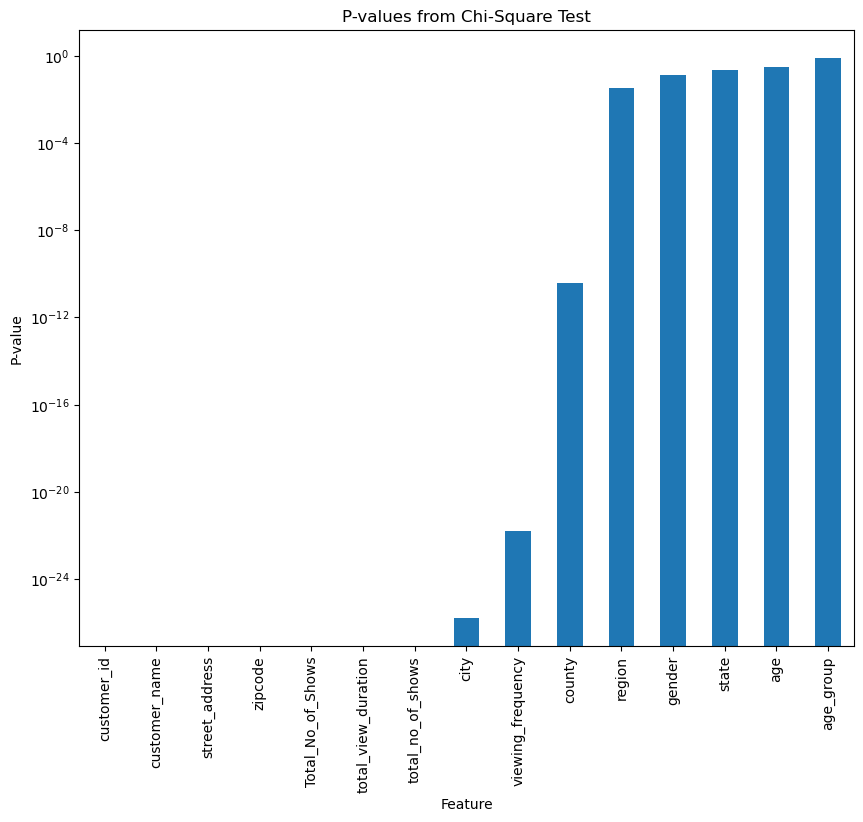

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# lbl_enc_df is my preprocessed DataFrame with label-encoded features
X = lbl_enc_df.drop('churn', axis=1)
y = lbl_enc_df['churn']

# Fill NaN values with the mode (most frequent value) for categorical data
for column in X.columns:
    X[column].fillna(X[column].mode()[0], inplace=True)

# Perform the chi-square test
chi_scores = chi2(X, y)
print('chi_scores =', chi_scores)

# Creating a Series with the p-values and feature names as the index
p_values = pd.Series(chi_scores[1], index=X.columns)

# Sorting the p-values in ascending order for better visualization
p_values.sort_values(ascending=True, inplace=True)

# Plotting the p-values using a bar chart
plt.figure(figsize=(10, 8))
p_values.plot.bar()
plt.title('P-values from Chi-Square Test')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.yscale('log')  # Using a logarithmic scale here for better visibility
plt.show()

### To interpret these results, we'll look at the p-values:

### A low p-value (typically ≤ 0.05) indicates that the corresponding feature is statistically significant in relation to the target variable. A common practice is to reject the null hypothesis of independence when the p-value is below the chosen significance level (alpha level).
### A high p-value suggests that there is no statistical evidence to reject the null hypothesis, and the feature may not be a good predictor of the target variable. 

### Dropping insignificant columns

In [30]:
columns_to_drop = ['age_group', 'age', 'state', 'gender']
lbl_enc_df = lbl_enc_df.drop(columns=columns_to_drop)

In [31]:
print(lbl_enc_df.head())

   customer_id  customer_name  street_address  city  zipcode  county  region  \
0            1           1298           26909  2977    90266     548       4   
1            2          43217            4782  3240    36695     609       2   
2            3          16994           25400  3729    48462     663       1   
3            4          49079            3653   419    35204     467       2   
4            5          34487           44059  2356    77338     410       3   

   churn  viewing_frequency  Total_No_of_Shows  total_view_duration  \
0      0                186               25.0               7057.0   
1      0                141               14.0               7376.0   
2      1                139               22.0               5592.0   
3      1                 11                2.0                589.0   
4      1                169               21.0               7651.0   

   total_no_of_shows  
0               25.0  
1               14.0  
2               22.0  


### Save this updated dataset into a csv 

In [32]:
lbl_enc_df.to_csv('/Users/aalladin/Downloads/Module 24/Customer_data_for_prediction_modeling.csv',index=False)

## Model Creation

In [33]:
from sklearn.model_selection import train_test_split

# lbl_enc_df is my preprocessed DataFrame with label-encoded features
y_data = lbl_enc_df['churn']
x_data = lbl_enc_df.drop('churn', axis=1)

# Splitting the data into training and test sets (70% training, 30% test)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size=0.3)

# Concatenating the training and test data with their corresponding labels
training_table = pd.concat([x_training_data, y_training_data], axis=1)
test_table = pd.concat([x_test_data, y_test_data], axis=1)


# Save the training and test data to CSV files
training_table.to_csv('/Users/aalladin/Downloads/Module 24/Training_Data.csv', index=False)
test_table.to_csv('/Users/aalladin/Downloads/Module 24/Test_Data.csv', index=False)

## Model Training and Testing

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_rf_model(y_training_data, x_training_data, x_test_data, y_test_data):
    rf = RandomForestClassifier()
    model = rf.fit(x_training_data, y_training_data)
    
    y_hat = model.predict(x_test_data)
    arr = np.c_[y_hat, y_test_data]
    print('\nPrinting predicted and actual values:\n', arr)
    print('\nAccuracy Score:\n', accuracy_score(y_test_data, y_hat))
    print('\nClassification Report:\n', classification_report(y_test_data, y_hat))

    # Calculate and print the confusion matrix
    conf_matrix = confusion_matrix(y_test_data, y_hat)
    print('\nConfusion Matrix:\n', conf_matrix)

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    return model, arr, y_hat, conf_matrix

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Instantiate the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Create a pipeline that first imputes the data then fits the classifier
pipeline = make_pipeline(imp, RandomForestClassifier())

# Now you can fit the pipeline to your data
pipeline.fit(x_training_data, y_training_data)

# Predict on new data
predictions = pipeline.predict(x_test_data)

### Evaluate Model Performance

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test_data, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
class_report = classification_report(y_test_data, predictions)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_mat = confusion_matrix(y_test_data, predictions)
print("Confusion Matrix:")
print(conf_mat)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83     10115
           1       0.67      0.41      0.51      4885

    accuracy                           0.74     15000
   macro avg       0.72      0.66      0.67     15000
weighted avg       0.73      0.74      0.72     15000

Confusion Matrix:
[[9151  964]
 [2895 1990]]


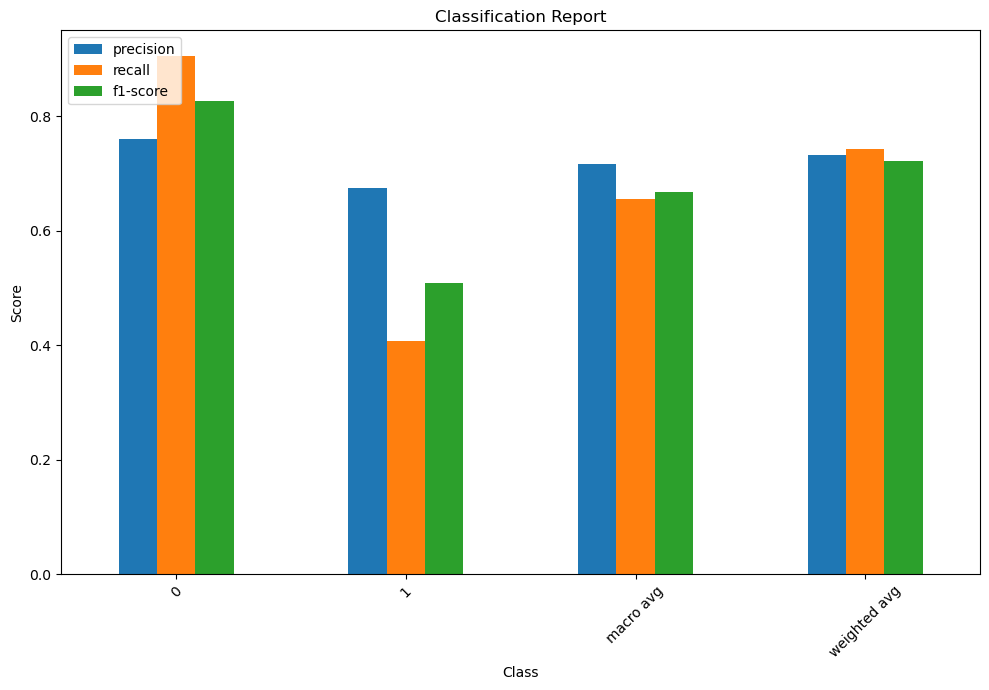

In [37]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Generate the classification report
class_report = classification_report(y_test_data, predictions, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(class_report).transpose()

# We will not include the 'support' column as it's not a performance metric
report_df = report_df.drop(columns=['support'])

# Now let's plot the DataFrame
report_df.drop(['accuracy'], inplace=True)  # Drop the 'accuracy' row as it is not a class label
report_df.plot(kind='bar', figsize=(10, 7))

plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

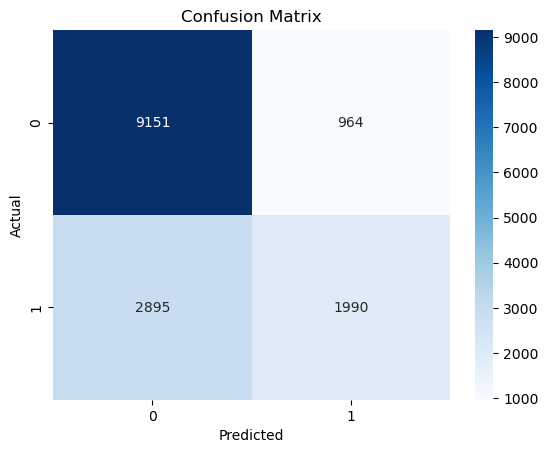

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### From the confusion matrix, it appears that the model is better at identifying the positive class than the negative class, given that there are a higher number of true positives (TP) compared to true negatives (TN)